# The Battle of Neighborhoods - New Delhi

<p>Being the greatest HubSpot of some of the most exquisite cuisines and lip-smacking local food from every corner of the world, New Delhi, the national capital of India, is proud to have some of the most unique and best restaurants within its lap. Any cuisine, Indian or International, name it and they have it.</p>
<p>In this project, we will explore the neighbourhood of New Delhi city and find out the best restaurants for certain cuisines.</p>

<h3>Importing necessary libraries</h3>

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                       

<h3>Reading the dataset</h3>

This dataset contains locality, restaurants, cuisines, ratings of the restaurants around the world along with their latitude and longitude. We extract the data of New Delhi using the latitude and longitudes provided. 

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_9954b7fa54ad44c0a953ec5d2c8bc5cc = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Fyh8nFl3QJwqiOUh2YimlRmB-bfeVNR-I3f9FEEODLxY',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_9954b7fa54ad44c0a953ec5d2c8bc5cc.get_object(Bucket='thebattleofneighborhoods-donotdelete-pr-s6evgbonto9cwi',Key='zomato.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body, encoding = 'ISO-8859-1')
df.head()


Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes  
0   Excellent    314  
1   Excellent    591  
2   Very Good    270  
3   Excellent    365  
4   Excellent    229

<h3>Data Extraction</h3>

In [4]:
df_IN = df[df['Country Code'] == 1]
df_ND = df_IN[df_IN['City'] == 'New Delhi']
df_ND.reset_index(drop = True, inplace = True)
df_ND.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  Average Cost for two  \
0                       Cuisine Varies                   500   
1                            Fast Food                   350   
2   North Indian, Seafood, Continental                  1500   
3           South Indian, North Indian                   500   
4  South Indian, North Indian, Chinese                   500   

             Currency Has Table booking Has Online delivery Is delivering now  \
0  Indian Rupees(Rs.)                No                  No                No   
1  Indian Rupees(Rs.)                No                 Yes                No   
2  Indian Rupees(Rs.)               Yes                 Yes                No   
3  Indian Rupees(Rs.)                No                  No                No   
4  Indian Rupees(Rs.)                No                 Yes                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            2               0.0        White   
1                   No            1               3.2       Orange   
2                   No            3               3.4       Orange   
3                   No            2               2.6       Orange   
4                   No            2               3.4       Orange   

  Rating text  Votes  
0   Not rated      2  
1     Average     46  
2     Average     45  
3     Average     11  
4     Average    238

In [5]:
df_ND.shape

(5473, 21)

<h3>Cleaning the dataset</h3>

In [6]:
data = df_ND[df_ND.Longitude != 0.000000][['Restaurant Name', 'Locality', 'Longitude', 'Latitude', 'Cuisines', 'Aggregate rating', 'Rating text', 'Votes']]

In [7]:
data = data[data['Aggregate rating'] != 0.0]
data.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

<h3>Using geopy to get latitude and longitude</h3>

In [8]:
address = 'New Delhi, ND'

geolocator = Nominatim(user_agent="nd_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 28.6141793, 77.2022662.


<h3>Creating a map to show restaurant clusters</h3

In [9]:
# create map of New York using latitude and longitude values
ndr = folium.Map(location=[latitude, longitude], zoom_start=10)

X = data['Latitude']
Y = data['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters = 5).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
data['Cluster'] = clusters

# add markers to map
for lat, lng, loc, clu in zip(data['Latitude'], data['Longitude'], data['Locality'], data['Cluster']):
    label = folium.Popup(loc, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[clu],
        fill_opacity=0.7).add_to(ndr)  
    
ndr

In [10]:
data.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Cluster  
1        0  
2        0  
3        0  
4        0  
5        0

<h3>Exploring the best restaurants in New Delhi based on Aggregate Rating</h3>

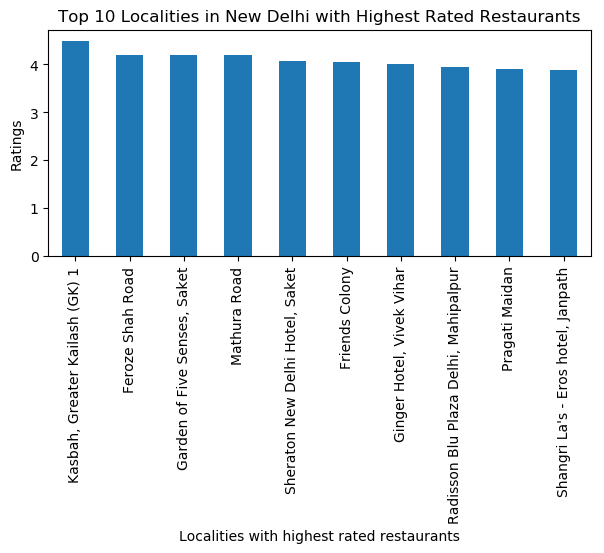

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(7,3), dpi = 100)
data.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')
plt.title('Top 10 Localities in New Delhi with Highest Rated Restaurants')
plt.xlabel('Localities with highest rated restaurants')
plt.ylabel('Ratings')
plt.show()

So, the best restaurants can be found at Kashbah, Greater Kailash 1.

<h3>Exploring places with highest number of restaurants</h3>

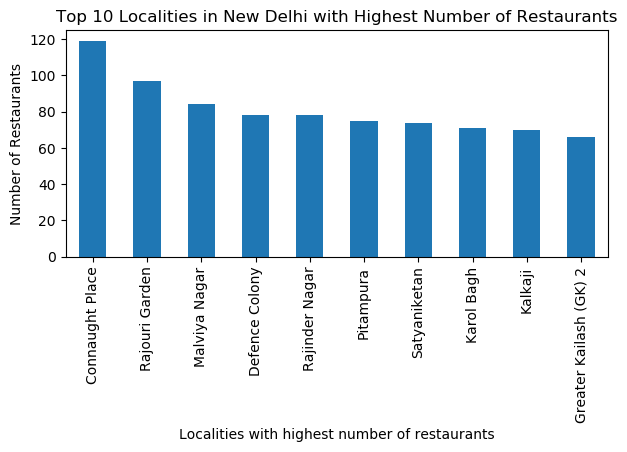

In [67]:
plt.figure(figsize=(7,3), dpi = 100)
data.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')
plt.title('Top 10 Localities in New Delhi with Highest Number of Restaurants')
plt.xlabel('Localities with highest number of restaurants')
plt.ylabel('Number of Restaurants')
plt.show()

Connaught Place has highest number of restaurants in New Delhi.

<h3>Exploring places with less number of restaurants</h3>

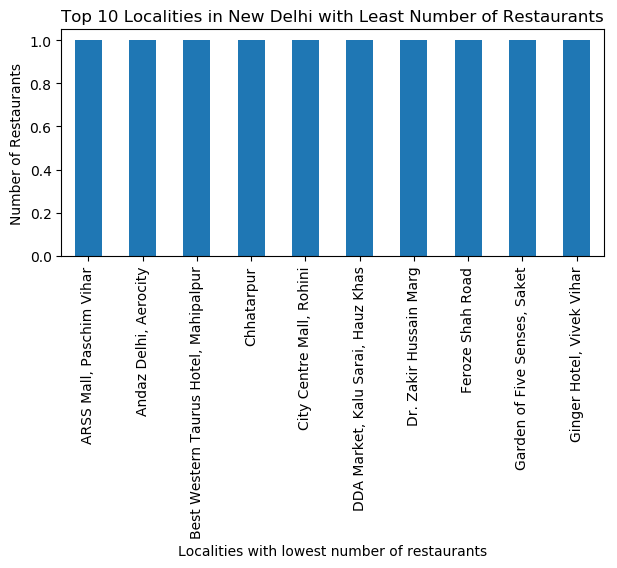

In [68]:
plt.figure(figsize=(7,3), dpi = 100)
data.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')
plt.title('Top 10 Localities in New Delhi with Least Number of Restaurants')
plt.xlabel('Localities with lowest number of restaurants')
plt.ylabel('Number of Restaurants')
plt.show()

ARSS Mall has least number of restaurants.

<h3>Exploring places with a lot of Chinese Restaurants</h3>

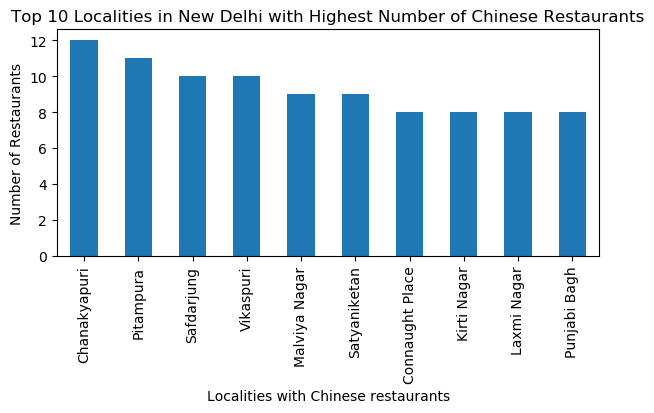

In [70]:
plt.figure(figsize=(7,3), dpi = 100)
data[data['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')
plt.title('Top 10 Localities in New Delhi with Highest Number of Chinese Restaurants')
plt.xlabel('Localities with Chinese restaurants')
plt.ylabel('Number of Restaurants')
plt.show()

Chanakyapuri has highest number of Chinese Restaurants.

<h3>Exploring Localities with Highest Rated Chinese Restaurants</h3>

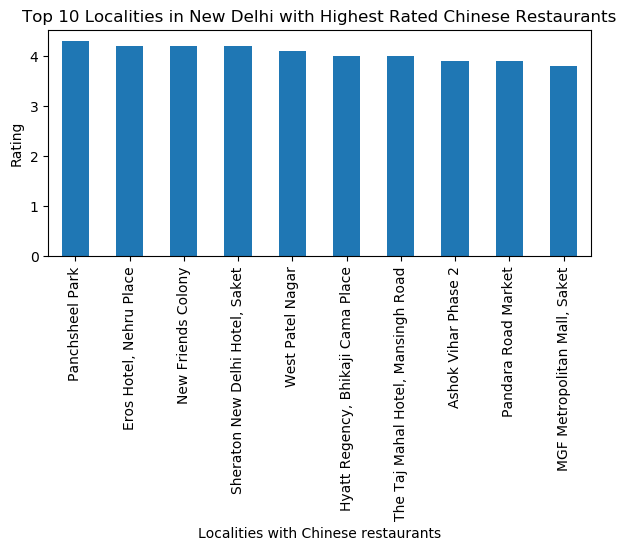

In [71]:
plt.figure(figsize=(7,3), dpi = 100)
data[data['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')
plt.title('Top 10 Localities in New Delhi with Highest Rated Chinese Restaurants')
plt.xlabel('Localities with Chinese restaurants')
plt.ylabel('Rating')
plt.show()

Panchsheel Park has best restaurants for Chinese cuisines.

In [24]:
data_Loc =  data.groupby('Locality').count()['Restaurant Name'].to_frame()
data_rating= data.groupby('Locality')['Aggregate rating'].mean().to_frame()
data_Cuisines = data.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
data_R = data.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
data_V = data.groupby(['Locality'])['Votes'].sum().to_frame()
data_Lat = data.groupby('Locality').mean()['Latitude'].to_frame()
data_Lng = data.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(data_Lat, data_Lng, on = 'Locality').merge(data_Loc, on = 'Locality').merge(data_Cuisines, on = 'Locality').merge(data_rating, on = 'Locality').merge(data_R, on = 'Locality').merge(data_V, on = 'Locality')

In [25]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cuisines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                            Cuisines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [28]:
df_final.shape

(240, 8)

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

<h3>Defining Foursquare API Credentials</h3>

In [29]:
CLIENT_ID = 'AARASHA0JFXVPJ10TXSRGGO3MM1FWT5ELJWTVSBPXIH0GPBA' # your Foursquare ID
CLIENT_SECRET = 'FNHZWDFJJZCYZD30XOQVXHMKUB4GVNESGP5VL2W00W0Q4RPL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AARASHA0JFXVPJ10TXSRGGO3MM1FWT5ELJWTVSBPXIH0GPBA
CLIENT_SECRET:FNHZWDFJJZCYZD30XOQVXHMKUB4GVNESGP5VL2W00W0Q4RPL


Lets explore the neighborhoods of New Delhi and find the top 100 venues within a radius of 500 meters.

In [34]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [35]:
# find the venues in all New Delhi Locality
ND_venues = getNearbyVenues(names = df_final['Locality'], latitudes = df_final['Lat'], longitudes=df_final['Lng'])

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [36]:
print(ND_venues.shape)
ND_venues.head()

(3199, 7)


Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1  Baljeet's Amritsari Koolcha       28.665768        77.100481   
2                    Pizza Hut       28.670321        77.103853   
3              Café Coffee Day       28.670009        77.102480   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1   Indian Restaurant  
2         Pizza Place  
3         Coffee Shop  
4  Chinese Restaurant

In [37]:
ND_venues.groupby('Locality').count()

Locality Latitude  \
Locality                                                            
ARSS Mall, Paschim Vihar                                        9   
Adchini                                                         7   
Aditya Mega Mall, Karkardooma                                  10   
Aerocity                                                        7   
Aggarwal City Mall, Pitampura                                   5   
Aggarwal City Plaza, Rohini                                     7   
Alaknanda                                                       4   
Ambience Mall, Vasant Kunj                                     46   
Anand Lok                                                      11   
Anand Vihar                                                     6   
Andaz Delhi, Aerocity                                          24   
Ansal Plaza Mall, Khel Gaon Marg                                4   
Asaf Ali Road                                                   5   
Ashok Vihar Phase 1                                             6   
Ashok Vihar Phase 2                                             8   
Ashok Vihar Phase 3                                             4   
Barakhamba Road                                                16   
Basant Lok Market, Vasant Vihar                                27   
Bellagio, Ashok Vihar Phase 2                                   7   
Best Western Taurus Hotel, Mahipalpur                          14   
Bhikaji Cama Place                                             13   
Chanakyapuri                                                    4   
Chander Nagar                                                   3   
Chandni Chowk                                                  19   
Chawri Bazar                                                    6   
Chhatarpur                                                      6   
Chittaranjan Park                                               6   
City Centre Mall, Rohini                                        9   
City Square Mall, Rajouri Garden                               26   
Civil Lines                                                     5   
Community Centre, New Friends Colony                           22   
Connaught Place                                                69   
Crescent Square Mall, Rohini                                    4   
Cross River Mall, Karkardooma                                   5   
Crowne Plaza Hotel, Rohini                                      6   
Crowne Plaza, Mayur Vihar Phase 1                              14   
D Mall, Netaji Subhash Place                                   17   
DDA Market, Kalu Sarai, Hauz Khas                               5   
DLF City Centre Mall, Shalimar Bagh                             6   
DLF Emporio Mall, Vasant Kunj                                  46   
DLF Place Mall, Saket                                          73   
DLF Promenade Mall, Vasant Kunj                                46   
DLF South Square, Sarojini Nagar                               13   
Daryaganj                                                      13   
Defence Colony                                                 18   
Delhi University-GTB Nagar                                     10   
Dilli Haat, INA                                                 5   
Dilshad Garden                                                  5   
District Centre, Janakpuri                                     13   
Dr. Zakir Hussain Marg                                         12   
East Patel Nagar                                               12   
East of Kailash                                                 8   
Epicuria Food Mall, Nehru Place                                27   
Eros Hotel, Nehru Place                                        26   
Essex Farms                                                     4   
Feroze Shah Road                                                1   
Friends Colony                                

In [38]:
print('There are {} uniques categories.'.format(len(ND_venues['Venue Category'].unique())))

There are 211 uniques categories.


Analyzing each neighborhood

In [39]:
# one hot encoding
ND_onehot = pd.get_dummies(ND_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
ND_onehot['Locality'] = ND_venues['Locality'] 

# move Locality column to the first column
column_list = ND_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
ND_onehot = ND_onehot[column_list]

ND_onehot.head()

Locality  ATM  Accessories Store  Afghan Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                  0   
1  ARSS Mall, Paschim Vihar    0                  0                  0   
2  ARSS Mall, Paschim Vihar    0                  0                  0   
3  ARSS Mall, Paschim Vihar    0                  0                  0   
4  ARSS Mall, Paschim Vihar    0                  0                  0   

   African Restaurant  Airport  Airport Food Court  Airport Lounge  \
0                   0        0                   0               0   
1                   0        0                   0               0   
2                   0        0                   0               0   
3                   0        0                   0               0   
4                   0        0                   0               0   

   Airport Service  Airport Terminal  American Restaurant  Andhra Restaurant  \
0                0                 0                    0                  0   
1                0                 0                    0                  0   
2                0                 0                    0                  0   
3                0                 0                    0                  0   
4                0                 0                    0                  0   

   Arcade  Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0       0            0           0                    0                 0   
1       0            0           0                    0                 0   
2       0            0           0                    0                 0   
3       0            0           0                    0                 0   
4       0            0           0                    0                 0   

   Athletics & Sports  Australian Restaurant  BBQ Joint  Bagel Shop  Bakery  \
0                   0                      0          0           0       0   
1                   0                      0          0           0       0   
2                   0                      0          0           0       0   
3                   0                      0          0           0       0   
4                   0                      0          0           0       0   

   Bank  Bar  Basketball Court  Bed & Breakfast  Beer Garden  \
0     0    0                 0                0            0   
1     0    0                 0                0            0   
2     0    0                 0                0            0   
3     0    0                 0                0            0   
4     0    0                 0                0            0   

   Bengali Restaurant  Bike Rental / Bike Share  Bistro  Bookstore  Boutique  \
0                   0                         0       0          0         0   
1                   0                         0       0          0         0   
2                   0                         0       0          0         0   
3                   0                         0       0          0         0   
4                   0                         0       0          0         0   

   Breakfast Spot  Bridal Shop  Burger Joint  Burmese Restaurant  \
0               0            0             0                   0   
1               0            0             0                   0   
2               0            0             0                   0   
3               0            0             0                   0   
4               0            0             0                   0   

   Burrito Place  Bus Station  Business Service  Cafeteria  Café  Campground  \
0              0            0                 0          0     0           0   
1              0            0                 0          0     0           0   
2              0            0                 0          0     0           0   
3              0            0                 0          0     0           0   
4              0            0                 0          0 

In [40]:
ND_grouped = ND_onehot.groupby('Locality').mean().reset_index()
ND_grouped

Locality       ATM  \
0                          ARSS Mall, Paschim Vihar  0.111111   
1                                           Adchini  0.000000   
2                     Aditya Mega Mall, Karkardooma  0.000000   
3                                          Aerocity  0.000000   
4                     Aggarwal City Mall, Pitampura  0.000000   
5                       Aggarwal City Plaza, Rohini  0.000000   
6                                         Alaknanda  0.000000   
7                        Ambience Mall, Vasant Kunj  0.000000   
8                                         Anand Lok  0.000000   
9                                       Anand Vihar  0.000000   
10                            Andaz Delhi, Aerocity  0.000000   
11                 Ansal Plaza Mall, Khel Gaon Marg  0.000000   
12                                    Asaf Ali Road  0.000000   
13                              Ashok Vihar Phase 1  0.000000   
14                              Ashok Vihar Phase 2  0.000000   
15                              Ashok Vihar Phase 3  0.000000   
16                                  Barakhamba Road  0.000000   
17                  Basant Lok Market, Vasant Vihar  0.000000   
18                    Bellagio, Ashok Vihar Phase 2  0.000000   
19            Best Western Taurus Hotel, Mahipalpur  0.000000   
20                               Bhikaji Cama Place  0.000000   
21                                     Chanakyapuri  0.000000   
22                                    Chander Nagar  0.000000   
23                                    Chandni Chowk  0.000000   
24                                     Chawri Bazar  0.000000   
25                                       Chhatarpur  0.000000   
26                                Chittaranjan Park  0.000000   
27                         City Centre Mall, Rohini  0.000000   
28                 City Square Mall, Rajouri Garden  0.000000   
29                                      Civil Lines  0.000000   
30             Community Centre, New Friends Colony  0.000000   
31                                  Connaught Place  0.000000   
32                     Crescent Square Mall, Rohini  0.000000   
33                    Cross River Mall, Karkardooma  0.000000   
34                       Crowne Plaza Hotel, Rohini  0.000000   
35                Crowne Plaza, Mayur Vihar Phase 1  0.000000   
36                     D Mall, Netaji Subhash Place  0.000000   
37                DDA Market, Kalu Sarai, Hauz Khas  0.000000   
38              DLF City Centre Mall, Shalimar Bagh  0.000000   
39                    DLF Emporio Mall, Vasant Kunj  0.000000   
40                            DLF Place Mall, Saket  0.000000   
41                  DLF Promenade Mall, Vasant Kunj  0.000000   
42                 DLF South Square, Sarojini Nagar  0.000000   
43                                        Daryaganj  0.000000   
44                                   Defence Colony  0.000000   
45                       Delhi University-GTB Nagar  0.000000   
46                                  Dilli Haat, INA  0.000000   
47                                   Dilshad Garden  0.000000   
48                       District Centre, Janakpuri  0.000000   
49                           Dr. Zakir Hussain Marg  0.000000   
50                                 East Patel Nagar  0.000000   
51                                  East of Kailash  0.000000   
52                  Epicuria Food Mall, Nehru Place  0.000000   
53                          Eros Hotel, Nehru Place  0.000000   
54                                      Essex Farms  0.000000   
55                                 Feroze Shah Road  0.000000   
56                                   Friends Colony  0.000000   
57                                        GTB Nagar  0.000000   
58                     Garden of Five Senses, Saket  0.000000   
59                                     Geeta Colony  0.000000   
60                        Ginger Hotel, Vivek Vihar  0.000000   
61           

In [41]:
ND_grouped.shape

(239, 212)

Printing each neighborhood with top 5 most common venues

In [42]:
num_top_venues = 5

for hood in ND_grouped['Locality']:
    print("----"+hood+"----")
    temp = ND_grouped[ND_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
                            venue  freq
0               Indian Restaurant  0.22
1                             ATM  0.11
2                     Coffee Shop  0.11
3                     Pizza Place  0.11
4  Multicuisine Indian Restaurant  0.11


----Adchini----
               venue  freq
0  Indian Restaurant  0.29
1                Pub  0.29
2               Café  0.29
3        Coffee Shop  0.14
4                ATM  0.00


----Aditya Mega Mall, Karkardooma----
               venue  freq
0        Pizza Place   0.2
1      Shopping Mall   0.2
2  Indian Restaurant   0.2
3          Multiplex   0.2
4              Hotel   0.1


----Aerocity----
                  venue  freq
0                 Hotel  0.29
1        Airport Lounge  0.14
2  Fast Food Restaurant  0.14
3   Rental Car Location  0.14
4           Coffee Shop  0.14


----Aggarwal City Mall, Pitampura----
                  venue  freq
0     Indian Restaurant   0.4
1           Pizza Place   0.2
2  Fast Food Res

                venue  freq
0   Indian Restaurant  0.11
1                 Bar  0.07
2      Clothing Store  0.07
3              Lounge  0.07
4  Chinese Restaurant  0.05


----DLF Promenade Mall, Vasant Kunj----
                  venue  freq
0           Coffee Shop  0.09
1  Fast Food Restaurant  0.07
2    Italian Restaurant  0.07
3      Asian Restaurant  0.07
4         Shopping Mall  0.07


----DLF South Square, Sarojini Nagar----
                  venue  freq
0     Indian Restaurant  0.31
1  Fast Food Restaurant  0.15
2         Women's Store  0.08
3         Shopping Mall  0.08
4                Market  0.08


----Daryaganj----
               venue  freq
0  Indian Restaurant  0.31
1         Restaurant  0.15
2             Hostel  0.15
3              Hotel  0.15
4               Road  0.08


----Defence Colony----
                venue  freq
0  Italian Restaurant  0.17
1   Indian Restaurant  0.17
2              Bakery  0.11
3         Coffee Shop  0.11
4        Burger Joint  0.06


----Delhi 



----JMD Kohinoor Mall, Greater Kailash----
                venue  freq
0                Café  0.17
1          Restaurant  0.13
2      Ice Cream Shop  0.09
3         Pizza Place  0.09
4  Italian Restaurant  0.04


----JNU----
                venue  freq
0       Shopping Mall  0.25
1  Airport Food Court  0.25
2   Indian Restaurant  0.25
3                Café  0.25
4                 ATM  0.00


----JW Marriott New Delhi----
                venue  freq
0               Hotel  0.35
1          Restaurant  0.08
2         Coffee Shop  0.08
3           Hotel Bar  0.08
4  Punjabi Restaurant  0.04


----Jail Road----
                 venue  freq
0    Indian Restaurant  0.22
1          Pizza Place  0.11
2    Indian Sweet Shop  0.11
3  Fried Chicken Joint  0.11
4       Ice Cream Shop  0.11


----Jama Masjid----
                venue  freq
0   Indian Restaurant  0.38
1         Flea Market  0.12
2              Mosque  0.12
3  Frozen Yogurt Shop  0.12
4       Metro Station  0.12


----Janakpuri----
 

               venue  freq
0            Theater  0.20
1  Indian Restaurant  0.13
2        Art Gallery  0.13
3               Café  0.13
4             Bakery  0.13


----Mathura Road----
                venue  freq
0      Breakfast Spot  0.25
1   Indian Sweet Shop  0.25
2   Indian Restaurant  0.25
3  Light Rail Station  0.25
4                 ATM  0.00


----Mayapuri Phase 2----
                     venue  freq
0                   Garden  0.33
1               Food Truck  0.33
2               Restaurant  0.33
3  New American Restaurant  0.00
4            Moving Target  0.00


----Mayur Vihar Phase 1----
                  venue  freq
0           Pizza Place  0.33
1     Indian Restaurant  0.33
2  Gym / Fitness Center  0.33
3             Nightclub  0.00
4         Moving Target  0.00


----Mayur Vihar Phase 2----
            venue  freq
0     Wings Joint   0.2
1       Juice Bar   0.2
2  Ice Cream Shop   0.2
3  Sandwich Place   0.2
4            Café   0.2


----Mayur Vihar Phase 3----
        

                        venue  freq
0                  Restaurant  0.25
1           Indian Restaurant  0.25
2         Moroccan Restaurant  0.12
3  Modern European Restaurant  0.12
4                  Food Truck  0.12


----R K Puram----
                     venue  freq
0          Thai Restaurant  0.14
1                Multiplex  0.14
2            Shopping Mall  0.14
3  Comfort Food Restaurant  0.14
4              Coffee Shop  0.14


----Race Course----
                  venue  freq
0  Gym / Fitness Center  0.25
1             Racetrack  0.25
2                  Food  0.25
3        History Museum  0.25
4                   ATM  0.00


----Radisson Blu Plaza Delhi, Mahipalpur----
                 venue  freq
0                Hotel  0.33
1      Thai Restaurant  0.17
2                  Spa  0.17
3    Indian Restaurant  0.17
4  American Restaurant  0.17


----Radisson Blu, Paschim Vihar----
                  venue  freq
0                 Hotel  0.33
1  Fast Food Restaurant  0.17
2     Indian Re

                  venue  freq
0           Coffee Shop  0.12
1  Fast Food Restaurant  0.08
2        Clothing Store  0.08
3                   ATM  0.04
4    Mexican Restaurant  0.04


----The Imperial, Janpath----
                      venue  freq
0                     Hotel  0.16
1         Indian Restaurant  0.12
2        Italian Restaurant  0.09
3                    Lounge  0.06
4  Mediterranean Restaurant  0.06


----The India Mall, New Friends Colony----
               venue  freq
0               Café  0.15
1              Hotel  0.10
2  Indian Restaurant  0.10
3      Movie Theater  0.05
4     Sandwich Place  0.05


----The Lalit New Delhi, Barakhamba Road----
               venue  freq
0  Indian Restaurant  0.33
1             Bakery  0.33
2          Hotel Bar  0.17
3   Asian Restaurant  0.17
4                ATM  0.00


----The Leela Ambience Convention Hotel----
               venue  freq
0      Shopping Mall   0.2
1  Indian Restaurant   0.2
2          Multiplex   0.2
3             

Putting in dataframe

In [44]:
#sorting venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [45]:
# creating the new dataframe and displaying the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = ND_grouped['Locality']

for ind in np.arange(ND_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ND_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality   1st Most Common Venue  \
0                          ARSS Mall, Paschim Vihar       Indian Restaurant   
1                                           Adchini                    Café   
2                     Aditya Mega Mall, Karkardooma       Indian Restaurant   
3                                          Aerocity                   Hotel   
4                     Aggarwal City Mall, Pitampura       Indian Restaurant   
5                       Aggarwal City Plaza, Rohini    Fast Food Restaurant   
6                                         Alaknanda             Coffee Shop   
7                        Ambience Mall, Vasant Kunj             Coffee Shop   
8                                         Anand Lok                    Café   
9                                       Anand Vihar                    Café   
10                            Andaz Delhi, Aerocity                   Hotel   
11                 Ansal Plaza Mall, Khel Gaon Marg     Japanese Restaurant   
12                                    Asaf Ali Road        Asian Restaurant   
13                              Ashok Vihar Phase 1              Smoke Shop   
14                              Ashok Vihar Phase 2              Smoke Shop   
15                              Ashok Vihar Phase 3             Pizza Place   
16                                  Barakhamba Road                 Theater   
17                  Basant Lok Market, Vasant Vihar                    Café   
18                    Bellagio, Ashok Vihar Phase 2       Indian Restaurant   
19            Best Western Taurus Hotel, Mahipalpur                   Hotel   
20                               Bhikaji Cama Place                  Lounge   
21                                     Chanakyapuri                    Park   
22                                    Chander Nagar             Pizza Place   
23                                    Chandni Chowk       Indian Restaurant   
24                                     Chawri Bazar       Indian Restaurant   
25                                       Chhatarpur       Indian Restaurant   
26                                Chittaranjan Park    Fast Food Restaurant   
27                         City Centre Mall, Rohini           Shopping Mall   
28                 City Square Mall, Rajouri Garden       Indian Restaurant   
29                                      Civil Lines              Smoke Shop   
30             Community Centre, New Friends Colony                    Café   
31                                  Connaught Place       Indian Restaurant   
32                     Crescent Square Mall, Rohini                Pharmacy   
33                    Cross River Mall, Karkardooma       Indian Restaurant   
34                       Crowne Plaza Hotel, Rohini      Light Rail Station   
35                Crowne Plaza, Mayur Vihar Phase 1                   Hotel   
36                     D Mall, Netaji Subhash Place       Indian Restaurant   
37                DDA Market, Kalu Sarai, Hauz Khas               Nightclub   
38              DLF City Centre Mall, Shalimar Bagh           Shopping Mall   
39                    DLF Emporio Mall, Vasant Kunj             Coffee Shop   
40                            DLF Place Mall, Saket       Indian Restaurant   
41                  DLF Promenade Mall, Vasant Kunj             Coffee Shop   
42                 DLF South Square, Sarojini Nagar       Indian Restaurant   
43                                        Daryaganj       Indian Restaurant   
44                                   Defence Colony       Indian Restaurant   
45                       Delhi University-GTB Nagar                    Café   
46                                  Dilli Haat, INA       Indian Restaurant   
47                                   Dilshad Garden       Indian Restaurant   
48                       District Centre, Janakpuri      Chinese Restaurant   
49                           Dr. Zakir Hussain Marg       Indian Restaurant   
50            

Clustering Neighborhoods using K-Means

In [57]:
# Running k-means to cluster the Locality into 5 clusters.

kclusters = 5

ND_clustering = ND_grouped.drop('Locality', 1)

kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(ND_clustering)

kmeans.labels_[0:10] 
kmeans.labels_.shape

(239,)

In [58]:
# adding clustering labels
ND_merged = df_final.head(239)
ND_merged['Cluster Labels'] = kmeans.labels_

# merging ND_grouped with df_Chinese to add latitude/longitude for each Locality
ND_merged = ND_merged.join(Locality_venues_sorted.set_index('Locality'), on = 'Locality')

ND_merged.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                            Cuisines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               0   
1  Average, Good, Poor, Very Good         1560               0   
2                   Average, Good          434               0   
3                         Average           59               4   
4                         Average          126               0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant                   ATM           Pizza Place   
1                  Café     Indian Restaurant                   Pub   
2     Indian Restaurant           Pizza Place         Shopping Mall   
3                 Hotel           Coffee Shop        Airport Lounge   
4     Indian Restaurant           Pizza Place      Department Store   

            4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0  Multicuisine Indian Restaurant           Coffee Shop        Sandwich Place   
1                     Coffee Shop         Women's Store   Fried Chicken Joint   
2                       Multiplex                  Café                 Hotel   
3            Fast Food Restaurant      Airport Terminal   Rental Car Location   
4            Fast Food Restaurant        Farmers Market    Frozen Yogurt Shop   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0    Chinese Restaurant                Market        Farmers Market   
1     French Restaurant            Food Truck            Food Court   
2     French Restaurant            Food Truck            Food Court   
3            Food Court            Food Truck        Farmers Market   
4   Fried Chicken Joint     French Restaurant            Food Truck   

  10th Most Common Venue  
0             Food Truck  
1      Food & Drink Shop  
2      Food & Drink Shop  
3      French Restaurant  
4             Food Court

Vizualising the clusters

In [59]:
# creating final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# setting color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]

colors = ['red', 'green', 'blue', 'yellow','orange']

# adding markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ND_merged['Lat'], ND_merged['Lng'], ND_merged['Locality'], ND_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Cluster 1

In [60]:
ND_merged.loc[ND_merged['Cluster Labels'] == 0, ND_merged.columns[[1] + list(range(5, ND_merged.shape[1]))]]

Lat  Agg_Rating                        Comments  No_of_Votes  \
0    28.668945    3.100000                         Average          117   
1    28.537063    3.292308  Average, Good, Poor, Very Good         1560   
2    28.656131    3.275000                   Average, Good          434   
4    28.690020    3.033333                         Average          126   
13   28.690182    3.090000             Average, Good, Poor          971   
23   28.656414    3.358182        Average, Good, Very Good         6668   
33   28.657388    3.320000                   Average, Good          636   
42   28.576161    2.983333             Average, Good, Poor          542   
43   28.643320    3.287500  Average, Good, Poor, Very Good         2570   
46   28.573241    3.225000             Average, Good, Poor         1106   
47   28.681582    3.046875             Average, Good, Poor         1224   
49   28.602169    2.900000                         Average            7   
55   28.617102    4.200000                       Very Good         3010   
61   28.668181    3.400000                         Average           33   
66   28.699373    3.252174                   Average, Good          973   
71   28.641003    3.650000                   Average, Good          367   
76   28.576785    3.200000                   Average, Good          143   
77   28.631728    3.060714  Average, Good, Poor, Very Good         1650   
82   28.548371    3.137500             Average, Good, Poor          609   
84   28.630942    3.122000  Average, Good, Poor, Very Good         1738   
85   28.648885    3.561111        Average, Good, Very Good         7411   
92   28.584294    3.100000                         Average           35   
97   28.662972    3.533333              Average, Very Good          293   
98   28.651527    3.490909        Average, Good, Very Good         3222   
99   28.648795    3.238028  Average, Good, Poor, Very Good         7282   
106  28.575525    3.126316                   Average, Good          998   
110  28.635391    3.040385  Average, Good, Poor, Very Good         2442   
113  28.541242    2.984615                         Average          817   
116  28.486576    2.950000                         Average            8   
118  28.646549    3.200000                         Average           20   
124  28.521760    4.200000                       Very Good          278   
126  28.602860    2.973214             Average, Good, Poor         1831   
133  28.708185    3.344444        Average, Good, Very Good          568   
140  28.627959    3.004167                         Average          326   
144  28.591092    3.200000             Average, Good, Poor          993   
153  28.608055    3.860000        Average, Good, Very Good         7978   
156  28.630734    3.185714                   Average, Good          244   
160  28.712975    3.066667                         Average          121   
165  28.539464    2.900000                         Average           14   
177  28.511482    2.750000                   Average, Poor          107   
199  28.601779    3.700000        Average, Good, Very Good          964   
202  28.646593    3.280952        Average, Good, Very Good         1624   
209  28.631362    3.537500                   Average, Good         1666   
223  28.619954    2.905714                   Average, Poor          242   
231  28.637492    3.062264             Average, Good, Poor         1253   

     Cluster Labels   1st Most Common Venue 2nd Most Common Venue  \
0                 0       Indian Restaurant                   ATM   
1                 0                    Café     Indian Restaurant   
2                 0       Indian Restaurant           Pizza Place   
4                 0       Indian Restaurant           Pizza Place   
13                0              Smoke Shop     Indian Restaurant   
23                0       Indian Restaurant           Snack Place   
33                0       Indian Restaurant                 Hotel   
42      

Cluster 2

In [61]:
ND_merged.loc[ND_merged['Cluster Labels'] == 1, ND_merged.columns[[1] + list(range(5, ND_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
5    28.700516    3.040000                  Average, Good, Poor          594   
6    28.527088    3.117391                  Average, Good, Poor         1012   
11   28.562580    3.750000             Average, Good, Very Good          875   
14   28.693969    3.378571                        Average, Good         2343   
15   28.691136    3.390909             Average, Good, Very Good          485   
18   28.696302    3.300000                        Average, Good          415   
22   28.654105    3.085714                              Average           80   
24   28.649658    3.800000  Average, Excellent, Good, Very Good         1410   
26   28.538688    3.130303                  Average, Good, Poor         2578   
27   28.716874    3.400000                              Average          134   
28   28.650254    3.166667                        Average, Good         1217   
29   28.681233    3.300000             Average, Good, Very Good          769   
34   28.720602    3.600000                                 Good          119   
36   28.692546    3.480000                        Average, Good          948   
37   28.541903    3.000000                              Average            4   
48   28.630149    2.950000                  Average, Good, Poor          471   
50   28.645084    3.235000       Average, Good, Poor, Very Good         2578   
51   28.557166    3.080000                   Average, Very Good         1120   
52   28.551417    3.505000             Average, Good, Very Good         7446   
53   28.549856    3.720000             Average, Good, Very Good          352   
54   28.543798    3.500000                        Average, Good          502   
57   28.699837    3.376471             Average, Good, Very Good         2460   
65   28.556980    3.272414                  Average, Good, Poor         5243   
67   28.554545    3.251786  Average, Excellent, Good, Very Good         5479   
73   28.643036    3.000000                              Average            7   
87   28.582031    3.117143       Average, Good, Poor, Very Good         2140   
90   28.642755    3.450000                        Average, Good          322   
94   28.538153    3.117143                  Average, Good, Poor         3642   
95   28.681154    3.453448             Average, Good, Very Good         5267   
101  28.667644    3.300000                              Average          132   
104  28.656263    3.097619                        Average, Good          965   
107  28.569394    3.252381                        Average, Good         1525   
122  28.535807    3.417857       Average, Good, Poor, Very Good        12088   
130  28.724100    3.133333                              Average          325   
132  28.706295    3.256000             Average, Good, Very Good         1717   
141  28.549169    3.196000       Average, Good, Poor, Very Good         2715   
142  28.693270    3.519149             Average, Good, Very Good         7642   
148  28.642402    3.195652                        Average, Good         2177   
152  28.544464    3.525000                   Average, Very Good          231   
155  28.669160    3.148214                  Average, Good, Poor         2735   
157  28.629505    2.600000                              Average           67   
158  28.700027    3.157333                  Average, Good, Poor         3974   
161  28.639872    3.134483                  Average, Good, Poor         1481   
164  28.668055    3.393333  Average, Excellent, Good, Very Good         4670   
170  28.643757    3.575000                        Average, Good         2879   
173  28.714176    3.352083       Average, Good, Poor, Very Good         4514   
181  28.571849    3.316667                        Average, Good          472   
187  28.629634    2.942857                              Average          151   
188  28.707685    3.168182             Average, Good, Very Good         1668   
193  28.569

Cluster 3

In [62]:
ND_merged.loc[ND_merged['Cluster Labels'] == 2, ND_merged.columns[[1] + list(range(5, ND_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
7    28.541298    3.425000                   Average, Good, Very Good   
8    28.555599    3.800000                         Average, Very Good   
9    28.659870    3.281481                              Average, Good   
16   28.630440    3.208333                        Average, Good, Poor   
17   28.557846    3.220000                        Average, Good, Poor   
20   28.568193    2.755556                              Average, Poor   
21   28.589797    3.085714                        Average, Good, Poor   
25   28.495624    2.700000                                    Average   
30   28.561898    3.100000                              Average, Good   
31   28.632091    3.779832        Average, Excellent, Good, Very Good   
32   28.718351    3.150000                              Average, Good   
38   28.702961    3.225000                              Average, Good   
39   28.543269    3.650000                                       Good   
40   28.528657    3.700000                   Average, Good, Very Good   
41   28.542647    3.761538                   Average, Good, Very Good   
44   28.574288    3.496154             Average, Good, Poor, Very Good   
45   28.696802    3.296296  Average, Excellent, Good, Poor, Very Good   
58   28.514237    4.200000                                  Very Good   
59   28.654883    3.053846                              Average, Good   
62   28.550319    3.701562        Average, Excellent, Good, Very Good   
63   28.535531    3.553030  Average, Excellent, Good, Poor, Very Good   
64   28.538014    3.475000                              Average, Good   
68   28.554275    3.845833        Average, Excellent, Good, Very Good   
75   28.569040    3.800000                            Good, Very Good   
78   28.597665    3.733333                   Average, Good, Very Good   
79   28.631930    3.300000                              Average, Good   
80   28.611614    3.366667                              Average, Good   
81   28.536611    3.380000                         Average, Excellent   
86   28.624632    3.315217  Average, Excellent, Good, Poor, Very Good   
88   28.626322    3.587500        Average, Excellent, Good, Very Good   
89   28.539003    3.150000                        Average, Good, Poor   
91   28.556503    3.400000                              Average, Good   
93   28.554084    3.541667                   Average, Good, Very Good   
96   28.516316    3.200000                                    Average   
100  28.556869    4.500000                                  Excellent   
102  28.600492    3.802326        Average, Excellent, Good, Very Good   
103  28.652501    3.080000                        Average, Good, Poor   
105  28.526489    3.300000                              Average, Good   
108  28.563827    3.800000                            Good, Very Good   
109  28.689561    3.311111                         Average, Very Good   
114  28.584615    3.303571             Average, Good, Poor, Very Good   
115  28.588675    3.285714                   Average, Good, Very Good   
117  28.529663    3.640000                   Average, Good, Very Good   
121  28.702381    3.100000                                    Average   
123  28.626791    3.250000                                    Average   
125  28.627715    3.125000                              Average, Good   
127  28.619410    3.134615                        Average, Good, Poor   
129  28.523047    2.925000                                    Average   
131  28.705307    3.800000                                       Good   
134  28.656939    3.234783             Average, Good, Poor, Very Good   
135  28.579641    3.180000                              Average, Good   
137  28.708865    3.008696                              Average, Good   
138  28.556145    3.040909                        Average, Good, Poor   
139  28.613451    2.900000                                    Average

Cluster 4

In [63]:
ND_merged.loc[ND_merged['Cluster Labels'] == 3, ND_merged.columns[[1] + list(range(5, ND_merged.shape[1]))]]

Lat  Agg_Rating       Comments  No_of_Votes  Cluster Labels  \
136  28.658244        3.24  Average, Good          567               3   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
136   Fried Chicken Joint         Women's Store          Dance Studio   

      4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
136  Furniture / Home Store    Frozen Yogurt Shop     French Restaurant   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
136            Food Truck            Food Court     Food & Drink Shop   

    10th Most Common Venue  
136                   Food

Cluster 5

In [64]:
ND_merged.loc[ND_merged['Cluster Labels'] == 4, ND_merged.columns[[1] + list(range(5, ND_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
3    28.553077    3.200000                              Average           59   
10   28.554807    3.000000                              Average            4   
12   28.641698    3.050000                              Average           17   
19   28.548827    2.700000                              Average            9   
35   28.590297    3.350000                        Average, Good          127   
56   28.570246    4.050000                   Average, Excellent         1949   
60   28.665829    4.000000                            Very Good          756   
69   28.550327    3.300000                              Average           30   
70   28.590654    3.550000                        Average, Good          302   
72   28.705700    3.350000                        Average, Good          278   
74   28.621267    3.416667                        Average, Good          475   
83   28.552895    3.300000                              Average           15   
111  28.618772    3.666667             Average, Good, Very Good          725   
112  28.552036    3.500000                                 Good           26   
119  28.545033    2.960000                        Average, Good          259   
120  28.673708    3.133333                              Average          113   
128  28.608252    2.945000                        Average, Good          406   
146  28.535040    3.175000                        Average, Good           60   
149  28.642910    2.996552       Average, Good, Poor, Very Good         2850   
162  28.725814    3.050000                              Average           50   
163  28.552711    3.100000                              Average            7   
168  28.543814    3.950000  Average, Excellent, Good, Very Good         1225   
169  28.667261    3.200000                              Average           76   
174  28.550802    3.250000                        Average, Good           34   
189  28.620715    3.880000             Average, Good, Very Good          626   
197  28.592724    2.985714                              Average          560   
205  28.600171    3.714286             Average, Good, Very Good         1733   
213  28.623619    3.466667                        Average, Good         1141   
217  28.535183    3.066667                              Average           37   
236  28.648177    3.675000             Average, Good, Very Good          876   
238  28.559928    3.075000                        Average, Good          923   

     Cluster Labels 1st Most Common Venue     2nd Most Common Venue  \
3                 4                 Hotel               Coffee Shop   
10                4                 Hotel                Restaurant   
12                4      Asian Restaurant         Indian Restaurant   
19                4                 Hotel         Indian Restaurant   
35                4                 Hotel         Indian Restaurant   
56                4                 Hotel                      Café   
60                4                 Hotel          Asian Restaurant   
69                4                 Hotel           Bed & Breakfast   
70                4                 Hotel                Restaurant   
72                4                Garden                      Park   
74                4                 Hotel         Indian Restaurant   
83                4                 Hotel                Restaurant   
111               4                 Hotel        Chinese Restaurant   
112               4                 Hotel                Restaurant   
119               4                 Hotel                Shoe Store   
120               4                  Café         Indian Restaurant   
128               4                 Hotel             Women's Store   
146               4            Restaurant       Sporting Goods Shop   
149               4                 Hotel         Indian Restaurant   
162               4           